In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-19 07:17:59--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.1’

spark-3.2.1-bin-had 100%[===================>] 260.01M  4.81MB/s    in 55s     

2023-05-19 07:18:55 (4.69 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.1’ saved [272637746/272637746]



In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("eda")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.functions import * 
from pyspark.ml import Pipeline 
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.classification import NaiveBayes 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

In [ ]:
cd_df = spark.read.csv("/content/combined-data1.csv", header=True, inferSchema=True)

In [ ]:
cd_df.printSchema()

In [ ]:
cd_df.show(5)

In [ ]:
df = cd_df.na.drop()

In [ ]:
df.show(5)

In [ ]:
df.describe().toPandas().transpose()

In [ ]:
df1 = cd_df.drop('userSessionId','teamLevel')

In [ ]:
df1.show(5)

In [ ]:
df1.stat.corr("count_gameclicks","count_hits")

In [ ]:
df2 = df1.toPandas()

In [ ]:
df2

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(df2.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [ ]:
df3=df1.dropna()

In [ ]:
df = df3.toPandas()

In [ ]:
df

In [ ]:
ads_df = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

In [ ]:
ads_df.show(5)

In [ ]:
ads_df2 = ads_df.drop('timestamp','txId','userSessionId','teamId','userId','adId')

In [ ]:
ads_df2.show(5)

In [ ]:
ads_df3 = ads_df2.toPandas()

In [ ]:
ads_sorted= ads_df3.sort_values('adCategory')

In [ ]:
ads_sorted

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y=ads_sorted["adCategory"])
plt.title('Number of ads by Category',weight='bold', size=15)
plt.ylabel('Ad Category', size=15, weight='bold')
plt.xlabel('Count', size=15, weight='bold')
plt.show()

In [ ]:
sns.countplot(y=df["platformType"],)

In [ ]:
df.hist(column='count_hits', bins=10)

In [ ]:
data = df.sort_values(by='count_hits', ascending=False)


In [ ]:
data1=data.head(10)

In [ ]:
data1

In [ ]:
ax = data1.plot.barh(x='userId', y='count_hits',xlabel='Hits',ylabel='user ID')

In [ ]:
test=df.groupby(['platformType'])['count_hits'].sum().reset_index()

In [ ]:
test

In [ ]:
ax1 = test.plot.barh(x='platformType', y='count_hits',ylabel='Platform',xlabel='Hits')

In [ ]:
teams = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)

In [ ]:
teams.show(5)

In [ ]:
teams1 = teams.drop('timestamp','assignmentId')

In [ ]:
teams1 = teams1.toPandas()

In [ ]:
teams1

In [ ]:
teamscount=teams1.groupby(['team']).count().reset_index()

In [ ]:
teamscount

In [ ]:
teamscount2=teamscount.head(10)

In [ ]:
ax2 = teamscount2.plot.barh(x='team', y='userId')

In [ ]:
hitspf=df.groupby(['platformType','count_hits']).sum().reset_index()

In [ ]:
hitspf

In [ ]:
hitspf2=hitspf.sort_values(by=['userId'])

In [ ]:
hitspf2

In [ ]:
buy = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

In [ ]:
buy1 = buy.drop('timestamp','txId','userSessionId')

In [ ]:
buy1.show(5)

In [ ]:
buy1 = buy1.toPandas()

In [ ]:
buy1

In [ ]:
teamprice=buy1.groupby(['team'])['price'].sum().reset_index()

In [ ]:
teamprice

In [ ]:
teampricesort=teamprice.sort_values(by=['price'],ascending=False)

In [ ]:
teampricesort

In [ ]:
teampricesort=teampricesort.head(10)

In [ ]:
ax3 = teampricesort.plot.barh(x='team', y='price',ylabel='Team ID',xlabel='Money Spent')

In [ ]:
playerprice=buy1.groupby(['userId'])['price'].sum().reset_index()

In [ ]:
playerprice

In [ ]:
playerpricesort=playerprice.sort_values(by=['price'],ascending=False)

In [ ]:
playerpricesort=playerpricesort.head(10)

In [ ]:
playerpricesort

In [ ]:
ax4 = playerpricesort.plot.barh(x='userId', y='price',ylabel='Team ID',xlabel='Money Spent')

Decision Tree

In [ ]:
df = spark.read.csv('/content/combined-data1.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       null|     null|
|  1658|         5649|        1|      iphone|              31|         5|       null|     null|
|  1589|         5650|        1|      iphone|              26|         2|       null|     null|
|  1863|         5651|        1|     android|              35|         4|       null|     null|
|   937|         5652|        1|     android|              39|         0|          1|      1.0|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
df2 = df.dropna()

In [ ]:
df2.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   937|         5652|        1|     android|              39|         0|          1|      1.0|
|  1623|         5659|        1|      iphone|             129|         9|          1|     10.0|
|    83|         5661|        1|     android|             102|        14|          1|      5.0|
|   121|         5665|        1|     android|              39|         4|          1|      3.0|
|   462|         5666|        1|     android|              90|        10|          1|      3.0|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import round

In [ ]:
df2 = df2.withColumn('label', (df2.count_hits >= 25).cast('integer'))

In [ ]:
df3 = df2.drop('userId','userSessionId','teamLevel','count_buyId')

In [ ]:
df3.show(5)

+------------+----------------+----------+---------+-----+
|platformType|count_gameclicks|count_hits|avg_price|label|
+------------+----------------+----------+---------+-----+
|     android|              39|         0|      1.0|    0|
|      iphone|             129|         9|     10.0|    0|
|     android|             102|        14|      5.0|    0|
|     android|              39|         4|      3.0|    0|
|     android|              90|        10|      3.0|    0|
+------------+----------------+----------+---------+-----+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_idx')

In [ ]:
indexer_model = indexer.fit(df3)

In [ ]:
df3_indexed = indexer_model.transform(df3)

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=[
    'platformType_idx', 'count_gameclicks',
    'avg_price', 
], outputCol='features')

In [ ]:
df_assembled = assembler.transform(df3_indexed)

In [ ]:
df_assembled.select('features', 'count_hits').show(5, truncate=False)

+----------------+----------+
|features        |count_hits|
+----------------+----------+
|[1.0,39.0,1.0]  |0         |
|[0.0,129.0,10.0]|9         |
|[1.0,102.0,5.0] |14        |
|[1.0,39.0,3.0]  |4         |
|[1.0,90.0,3.0]  |10        |
+----------------+----------+
only showing top 5 rows



In [ ]:
hits_train, hits_test = df_assembled.randomSplit([0.8, 0.2], seed=1)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier()
tree_model = tree.fit(hits_train)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(hits_test)
prediction.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+-----------------------------------------+
|label|prediction|probability                              |
+-----+----------+-----------------------------------------+
|0    |0.0       |[0.9866071428571429,0.013392857142857142]|
|0    |0.0       |[0.9866071428571429,0.013392857142857142]|
|0    |0.0       |[0.9866071428571429,0.013392857142857142]|
|0    |0.0       |[0.9866071428571429,0.013392857142857142]|
|0    |0.0       |[0.9866071428571429,0.013392857142857142]|
+-----+----------+-----------------------------------------+
only showing top 5 rows



In [ ]:

prediction.groupBy('label', 'prediction').count().show()


TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label = 1').count()
FP = prediction.filter('prediction = 1 AND label = 0').count()


accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|    6|
|    0|       0.0|  212|
|    1|       1.0|   42|
|    0|       1.0|    4|
+-----+----------+-----+

0.9621212121212122


Naive Bayes

In [ ]:
df = spark.read.csv('/content/combined-data1.csv', sep=',', header=True, inferSchema=True, nullValue='NA')
df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       null|     null|
|  1658|         5649|        1|      iphone|              31|         5|       null|     null|
|  1589|         5650|        1|      iphone|              26|         2|       null|     null|
|  1863|         5651|        1|     android|              35|         4|       null|     null|
|   937|         5652|        1|     android|              39|         0|          1|      1.0|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
df2 = df.dropna()

In [ ]:
df2 = df2.withColumn('label', (df2.avg_price >= 5).cast('integer'))

In [ ]:
df3 = df2.drop('userId','userSessionId','teamLevel','count_buyId')

In [ ]:
df3.show(5)

+------------+----------------+----------+---------+-----+
|platformType|count_gameclicks|count_hits|avg_price|label|
+------------+----------------+----------+---------+-----+
|     android|              39|         0|      1.0|    0|
|      iphone|             129|         9|     10.0|    1|
|     android|             102|        14|      5.0|    1|
|     android|              39|         4|      3.0|    0|
|     android|              90|        10|      3.0|    0|
+------------+----------------+----------+---------+-----+
only showing top 5 rows



In [ ]:
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_idx')

In [ ]:
indexer_model = indexer.fit(df3)

In [ ]:
df3_indexed = indexer_model.transform(df3)

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=[
    'platformType_idx', 'count_gameclicks','count_hits',
], outputCol='features')

In [ ]:
df_assembled = assembler.transform(df3_indexed)

In [ ]:
df_assembled.select('features', 'avg_price').show(5, truncate=False)

+----------------+---------+
|features        |avg_price|
+----------------+---------+
|[1.0,39.0,0.0]  |1.0      |
|[0.0,129.0,9.0] |10.0     |
|[1.0,102.0,14.0]|5.0      |
|[1.0,39.0,4.0]  |3.0      |
|[1.0,90.0,10.0] |3.0      |
+----------------+---------+
only showing top 5 rows



In [ ]:
spending_train, spending_test = df_assembled.randomSplit([0.8, 0.2], seed=1)

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier


nb = NaiveBayes(modelType='multinomial')
nbmodel = nb.fit(spending_train)

In [ ]:
prediction = nbmodel.transform(spending_test)
prediction.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|1    |0.0       |[0.8140171321940095,0.18598286780599044]|
|0    |0.0       |[0.7923144386490544,0.20768556135094554]|
|0    |0.0       |[0.8034403640967792,0.1965596359032207] |
|0    |0.0       |[0.8141101001520928,0.18588989984790708]|
|0    |0.0       |[0.8243478193141679,0.17565218068583216]|
+-----+----------+----------------------------------------+
only showing top 5 rows



In [ ]:

prediction.groupBy('label', 'prediction').count().show()


TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label = 1').count()
FP = prediction.filter('prediction = 1 AND label = 0').count()


accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   28|
|    0|       0.0|  121|
|    1|       1.0|   97|
|    0|       1.0|   18|
+-----+----------+-----+

0.8257575757575758


K means Clustering

In [ ]:
df = spark.read.csv('/content/combined-data1.csv', sep=',', header=True, inferSchema=True, nullValue='NA')
df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       null|     null|
|  1658|         5649|        1|      iphone|              31|         5|       null|     null|
|  1589|         5650|        1|      iphone|              26|         2|       null|     null|
|  1863|         5651|        1|     android|              35|         4|       null|     null|
|   937|         5652|        1|     android|              39|         0|          1|      1.0|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
df2 = df.dropna()

In [ ]:
df3 = df2.drop('userId','userSessionId','teamLevel','platformType','count_buyId')

In [ ]:
num_cols = ['count_gameclicks', 'count_hits', 'avg_price']

In [ ]:

assemble=VectorAssembler(inputCols=num_cols, outputCol='features')
scale=StandardScaler(inputCol='features',outputCol='standardized')
km = KMeans(featuresCol = 'standardized')


pipe = Pipeline(stages=[assemble, scale, km])

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator


evaluator = ClusteringEvaluator()


for k in range(2,10):
  # set the KMeans stage of the pipe to hold each value of K and the random seed = 1 and fit that pipe to data  
  kmeans = pipe.getStages()[-1].setK(k).setSeed(3)  
  model = pipe.fit(df3)
  
 
  predictions = model.transform(df3)

   
  silhouette = evaluator.evaluate(predictions)
  print(f'Tested: {k} clusters: {silhouette}')

Tested: 2 clusters: 0.8791124447845252
Tested: 3 clusters: 0.11592377959248912
Tested: 4 clusters: 0.16425527315275684
Tested: 5 clusters: 0.10958097753796746
Tested: 6 clusters: 0.24634170737002978
Tested: 7 clusters: 0.09846761768964858
Tested: 8 clusters: -0.03141173789374087
Tested: 9 clusters: 0.017989744261837862


In [ ]:
pipe.getStages()[-1].setK(2).setSeed(1)  


model = pipe.fit(df3)
clusters = model.transform(df3)
clusters.show()

+----------------+----------+---------+----------------+--------------------+----------+
|count_gameclicks|count_hits|avg_price|        features|        standardized|prediction|
+----------------+----------+---------+----------------+--------------------+----------+
|              39|         0|      1.0|  [39.0,0.0,1.0]|[0.32564337906060...|         1|
|             129|         9|     10.0|[129.0,9.0,10.0]|[1.07712809996968...|         1|
|             102|        14|      5.0|[102.0,14.0,5.0]|[0.85168268369695...|         1|
|              39|         4|      3.0|  [39.0,4.0,3.0]|[0.32564337906060...|         1|
|              90|        10|      3.0| [90.0,10.0,3.0]|[0.75148472090908...|         1|
|              51|         8|     20.0| [51.0,8.0,20.0]|[0.42584134184847...|         1|
|              51|         6|      2.5|  [51.0,6.0,2.5]|[0.42584134184847...|         1|
|              47|         5|      2.0|  [47.0,5.0,2.0]|[0.39244202091918...|         1|
|              46|   

In [ ]:
df = clusters.toPandas()

In [ ]:
df

,count_gameclicks,count_hits,avg_price,features,standardized,prediction
0,39,0,1.0,"[39.0, 0.0, 1.0]","[0.32564337906060153, 0.0, 0.15298704039665895]",1
1,129,9,10.0,"[129.0, 9.0, 10.0]","[1.077128099969682, 0.6634266801199267, 1.5298...",1
2,102,14,5.0,"[102.0, 14.0, 5.0]","[0.8516826836969579, 1.0319970579643303, 0.764...",1
3,39,4,3.0,"[39.0, 4.0, 3.0]","[0.32564337906060153, 0.29485630227552295, 0.4...",1
4,90,10,3.0,"[90.0, 10.0, 3.0]","[0.7514847209090805, 0.7371407556888074, 0.458...",1
...,...,...,...,...,...,...
1406,119,14,1.0,"[119.0, 14.0, 1.0]","[0.9936297976464509, 1.0319970579643303, 0.152...",1
1407,190,21,5.0,"[190.0, 21.0, 5.0]","[1.5864677441413921, 1.5479955869464954, 0.764...",1
1408,28,3,2.0,"[28.0, 3.0, 2.0]","[0.23379524650504727, 0.22114222670664221, 0.3...",1
1409,108,11,10.0,"[108.0, 11.0, 10.0]","[0.9017816650908965, 0.8108548312576881, 1.529...",1


In [ ]:
ax = px.scatter_3d(df, x='count_gameclicks', y='count_hits', z='avg_price', color='prediction', template='ggplot2')
ax.show()

Hierarchical Clustering (Bisecting Kmeans)

In [ ]:
df = spark.read.csv('/content/combined-data1.csv', sep=',', header=True, inferSchema=True, nullValue='NA')
df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       null|     null|
|  1658|         5649|        1|      iphone|              31|         5|       null|     null|
|  1589|         5650|        1|      iphone|              26|         2|       null|     null|
|  1863|         5651|        1|     android|              35|         4|       null|     null|
|   937|         5652|        1|     android|              39|         0|          1|      1.0|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
df2 = df.dropna()

In [ ]:
df3 = df2.drop('userId','userSessionId','teamLevel','platformType','count_buyId')

In [ ]:
df3

DataFrame[count_gameclicks: int, count_hits: int, avg_price: double]

In [ ]:
num_cols = ['count_gameclicks', 'count_hits', 'avg_price']

In [ ]:
from pyspark.ml.clustering import BisectingKMeans

In [ ]:
assemble=VectorAssembler(inputCols=[
'count_gameclicks','count_hits','avg_price'], outputCol='features')
assembled_data=assemble.transform(df3)
assembled_data.show(2)

+----------------+----------+---------+----------------+
|count_gameclicks|count_hits|avg_price|        features|
+----------------+----------+---------+----------------+
|              39|         0|      1.0|  [39.0,0.0,1.0]|
|             129|         9|     10.0|[129.0,9.0,10.0]|
+----------------+----------+---------+----------------+
only showing top 2 rows



In [ ]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(2)

+----------------+----------+---------+----------------+--------------------+
|count_gameclicks|count_hits|avg_price|        features|        standardized|
+----------------+----------+---------+----------------+--------------------+
|              39|         0|      1.0|  [39.0,0.0,1.0]|[0.32564337906060...|
|             129|         9|     10.0|[129.0,9.0,10.0]|[1.07712809996968...|
+----------------+----------+---------+----------------+--------------------+
only showing top 2 rows



In [ ]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='features', \
metricName='silhouette')
for K in range(2,11):

    BKMeans_=BisectingKMeans(featuresCol='standardized', k=K, minDivisibleClusterSize =1)

    BKMeans_fit=BKMeans_.fit(data_scale_output)

    BKMeans_transform=BKMeans_fit.transform(data_scale_output) 

    evaluation_score=evaluator.evaluate(BKMeans_transform)

    silhouette_scores.append(evaluation_score)

Text(0, 0.5, 'Silhouette Score')

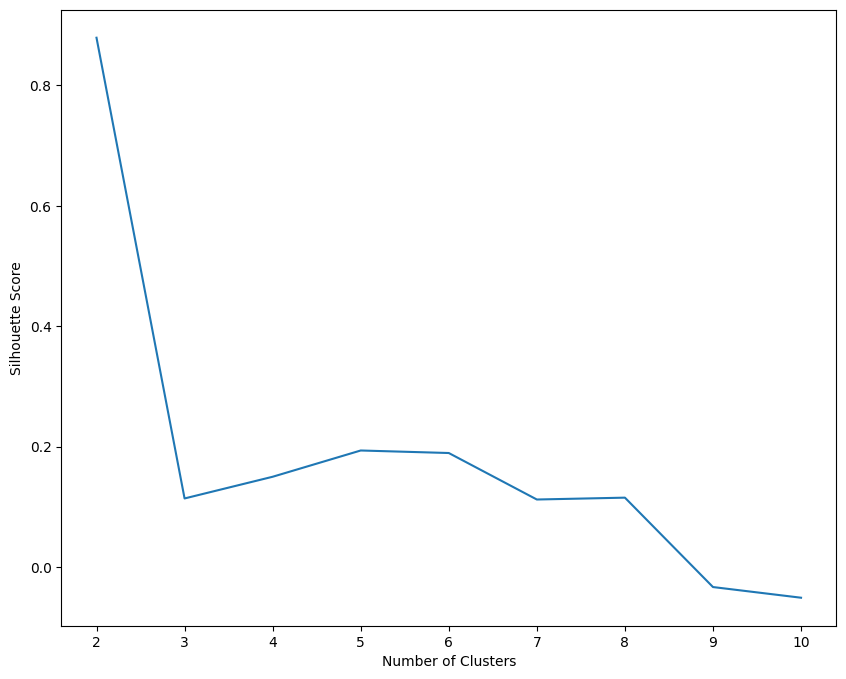

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [ ]:
BKMeans_=BisectingKMeans(featuresCol='features', k=2) 
BKMeans_Model=BKMeans_.fit(data_scale_output)
BKMeans_transform=BKMeans_Model.transform(data_scale_output)

In [ ]:
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(data_scale_output)
pca_transformed = pca_model.transform(data_scale_output)

In [ ]:
import numpy as np
X_pca = pca_transformed.rdd.map(lambda row: row.pca).collect()
X_pca = np.array(X_pca)

In [ ]:
cluster_assignment = np.array(BKMeans_transform.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

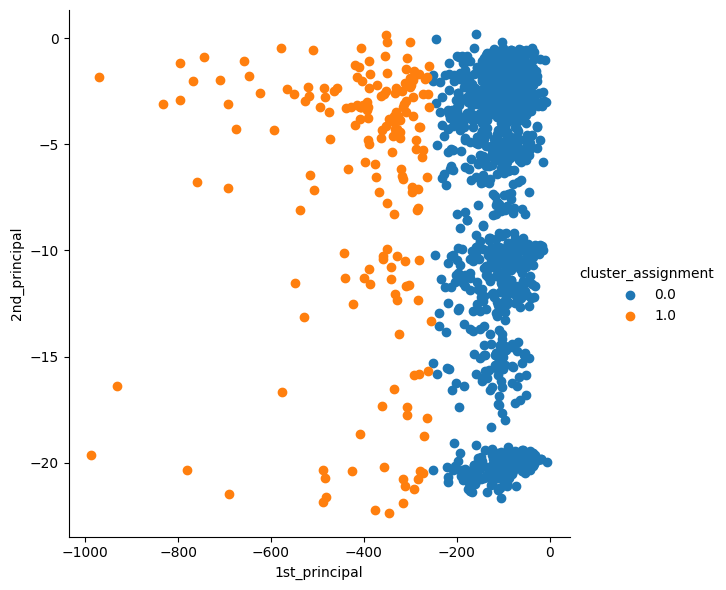

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_data = np.hstack((X_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.show()

Graph Code for Neo4j


In [ ]:
#Adding datasets to neo4j
LOAD CSV with headers FROM "file:///chat_join_team_chat" AS row
MERGE (u:User {id: row.user_id}) 
MERGE (c:TeamChatSession {id: row.teamchat_session_id}) 
MERGE (u)-[:Join{timeStamp: row.date}]->(c)

LOAD CSV with headers FROM "file:///chat_leave_team_chat" AS row
MERGE (u:User {id: row.user_id}) 
MERGE (c:TeamChatSession {id: row.teamchat_session_id}) 
MERGE (u)-[:Leaves{timeStamp: row.date}]->(c)


LOAD CSV with headers FROM 'file:///chat_mention_team_chat' AS row 
MERGE (i:ChatItem {id: row.chat_item}) 
MERGE (u:User {id: row.user_id}) 
MERGE (i)-[:Mentioned{timeStamp: row.date}]->(u)

LOAD CSV with headers FROM 'file:///chat_respond_team_chat' AS row 
MERGE (i:ChatItem {id: row.chatid1}) 
MERGE (j:ChatItem {id: row.chatid2}) 
MERGE (i)-[:ResponseTo{timeStamp: row.date}]->(j)


#Join and leave queries for 1 and 5 chat sessions
MATCH (a)-[:Join]->(b)
RETURN b, COLLECT(a) as joiners
ORDER BY SIZE(joiners) DESC LIMIT 1

MATCH (a)-[:Join]->(b)
RETURN b, COLLECT(a) as joiners
ORDER BY SIZE(joiners) DESC LIMIT 5

#Chat Items by user
match (u:User)-[:Mentioned]-(i:ChatItem)
return u.id as Users,count(u.id) as chatitems
ORDER BY count(u.id) desc limit 10

#mention and respond to query
match x = (p:User) - [:Mentioned] - (i:ChatItem) - [:RespondsTo] -() return x limit 100

#Longest conversation thread
match p=(i:ChatItem)-[:RespondsTo*]->(j:ChatItem)
return p, length(p) order by length(p) desc limit 1

#Degree Centralities
MATCH (p:User)
RETURN p, size([(p)-[:Join]-() | 1]) AS degree_centrality
ORDER BY degree_centrality DESC LIMIT 10

MATCH (p:User)
RETURN p, size([(p)-[:Leaves]-() | 1]) AS degree_centrality
ORDER BY degree_centrality DESC LIMIT 10

MATCH (p:User)
RETURN p, size([(p)-[:Mentioned]-() | 1]) AS degree_centrality
ORDER BY degree_centrality DESC LIMIT 10

MATCH (p:ChatItem)
RETURN p, size([(p)-[:RespondsTo]-() | 1]) AS degree_centrality
ORDER BY degree_centrality DESC LIMIT 10



